In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('datasets/heart.csv')

In [ ]:
# DATASET LOADING : 

In [8]:
forestfire = pd.read_csv('datasets/forestfires.csv')

In [11]:
airquality = pd.read_csv('datasets/weatherHistory.csv')

In [12]:
print(heart.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [13]:
print(forestfire.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [14]:
print(airquality.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [15]:
print(heart.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# DATASET CLEANING : 

In [16]:
print(forestfire.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [17]:
print(airquality.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [19]:
most_common_PrecipType = airquality['Precip Type'].mode()[0]

In [20]:
airquality.fillna(most_common_PrecipType, inplace=True)

In [22]:
print(airquality.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [23]:
print(heart.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [24]:
print(forestfire.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool


In [25]:
print(airquality.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Length: 96453, dtype: bool


In [26]:
# DATASET INTEGRATION : 

In [27]:
forestfire['ID'] = range(1, len(forestfire)+1)

In [28]:
airquality['ID'] = range(1, len(airquality)+1)

In [29]:
df_merged = pd.merge(forestfire, airquality, on='ID')

In [30]:
print(df_merged.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  ...  Precip Type  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51  ...         rain   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33  ...         rain   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33  ...         rain   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97  ...         rain   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99  ...         rain   

   Temperature (C)  Apparent Temperature (C)  Humidity Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89           14.1197   
1         9.355556                  7.227778      0.86           14.2646   
2         9.377778                  9.377778      0.89            3.9284   
3         8.288889                  5.944444      0.83           14.1036   
4         8.755556                  6.977778      0.83           11.0446   

  Wind Bearing (degrees) Visibility (km)  Loud Cover  Pressure (millibars)  \
0                  2

In [31]:
# DATASET TRANSFORMATION : 

In [32]:
## One-Hot encoding : 

In [36]:
heart_chestpain_encoded = pd.get_dummies(heart, columns=['ChestPainType'], drop_first=True) 

In [37]:
print(heart_chestpain_encoded.head())

   Age Sex  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M        140          289          0     Normal    172   
1   49   F        160          180          0     Normal    156   
2   37   M        130          283          0         ST     98   
3   48   F        138          214          0     Normal    108   
4   54   M        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  ChestPainType_ATA  \
0              N      0.0       Up             0               True   
1              N      1.0     Flat             1              False   
2              N      0.0       Up             0               True   
3              Y      1.5     Flat             1              False   
4              N      0.0       Up             0              False   

   ChestPainType_NAP  ChestPainType_TA  
0              False             False  
1               True             False  
2              False             False  
3     

In [104]:
print(forestfire_encoded.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_may  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  day_thu  \
0      False      False      False    False    False    False    False   
1      False       True      False    False    False    False    False   
2      False       True      False    False     True    False    False   
3      False      False      False    False    False    False    False   
4      False      False      False    False    False     True    False   

   day_tue  day_wed  
0    False    False  
1     True    False  
2    False    False  
3    False    False  
4    F

In [38]:
## Label encoding :

In [41]:
le = LabelEncoder()

In [42]:
airquality['Summary_encoded'] = le.fit_transform(airquality['Summary'])

In [44]:
print(airquality['Summary_encoded'])

0        19
1        19
2        17
3        19
4        17
         ..
96448    19
96449    19
96450    19
96451    19
96452    19
Name: Summary_encoded, Length: 96453, dtype: int32


In [45]:
## MinMaxScaler(Normalisation) :

In [47]:
scaler = MinMaxScaler()

In [49]:
forestfire['temp_normalised'] = scaler.fit_transform(forestfire[['temp']])

In [52]:
print("Normalised Temperature:\n\n",forestfire[['temp','temp_normalised']])

Normalised Temperature:

      temp  temp_normalised
0     8.2         0.192926
1    18.0         0.508039
2    14.6         0.398714
3     8.3         0.196141
4    11.4         0.295820
..    ...              ...
512  27.8         0.823151
513  21.9         0.633441
514  21.2         0.610932
515  25.6         0.752412
516  11.8         0.308682

[517 rows x 2 columns]


In [53]:
## Z-Score Normalisation(Standarization) :

In [55]:
Scaler = StandardScaler()

In [57]:
airquality['temp_standarized'] = Scaler.fit_transform(airquality[['Temperature (C)']])

In [58]:
print("Standarized Temperature:\n\n",airquality[['Temperature (C)','temp_standarized']])

Standarized Temperature:

        Temperature (C)  temp_standarized
0             9.472222         -0.257599
1             9.355556         -0.269814
2             9.377778         -0.267487
3             8.288889         -0.381489
4             8.755556         -0.332631
...                ...               ...
96448        26.016667          1.474532
96449        24.583333          1.324468
96450        22.038889          1.058076
96451        21.522222          1.003983
96452        20.438889          0.890563

[96453 rows x 2 columns]


In [103]:
# DATA MODELLING : 

In [111]:
print(forestfire.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  ID
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   1
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   2
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   3
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   4
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   5


In [112]:
forestfire2 = pd.get_dummies(forestfire, columns=['month','day'], drop_first=True)

In [113]:
print(forestfire2.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_may  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  day_thu  \
0      False      False      False    False    False    False    False   
1      False       True      False    False    False    False    False   
2      False       True      False    False     True    False    False   
3      False      False      False    False    False    False    False   
4      False      False      False    False    False     True    False   

   day_tue  day_wed  
0    False    False  
1     True    False  
2    False    False  
3    False    False  
4    F

In [114]:
X = forestfire2.drop('temp',axis=1)

In [115]:
y = forestfire2['temp']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [128]:
model = LinearRegression()

In [129]:
model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)

In [131]:
print("MSE : ",mean_squared_error(y_pred,y_test))

MSE :  8.47761045547128


In [132]:
print("R2_Score: ",r2_score(y_pred,y_test))

R2_Score:  0.7266536006010449


In [133]:
# DATA VISUALIZATION :

In [134]:
## Histogram:

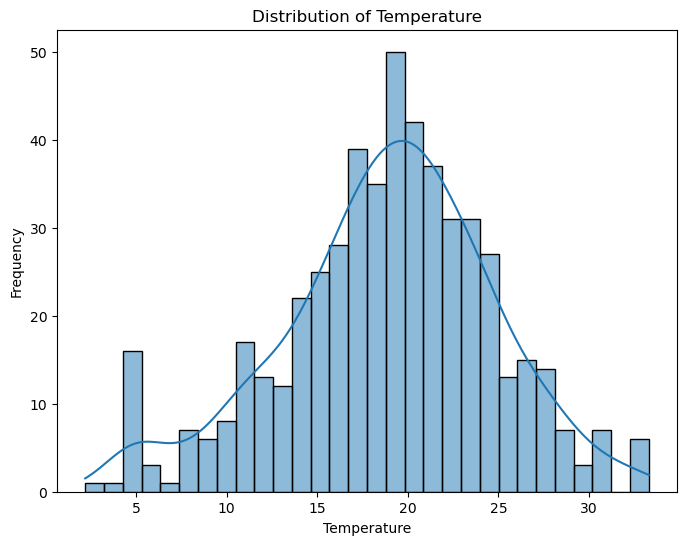

In [144]:
plt.figure(figsize=(8,6))
sns.histplot(forestfire2['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [145]:
## Scatterplot:

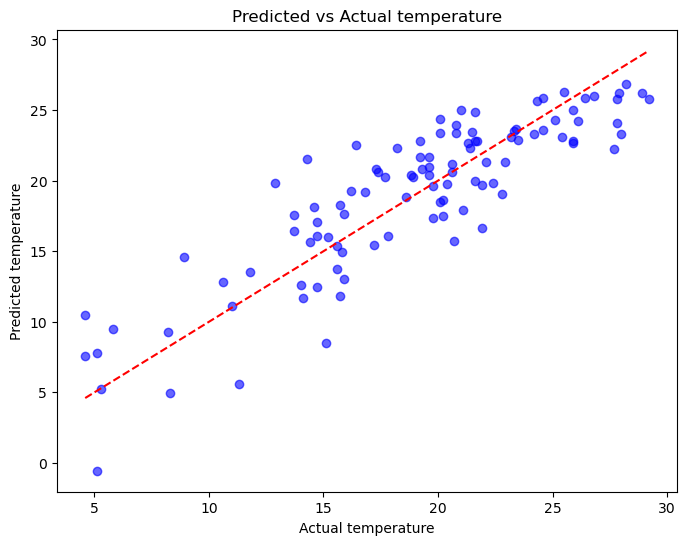

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.6)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red', linestyle='--')
plt.title("Predicted vs Actual temperature")
plt.xlabel('Actual temperature')
plt.ylabel('Predicted temperature')
plt.show()

In [148]:
## Correaltion-Heatmap

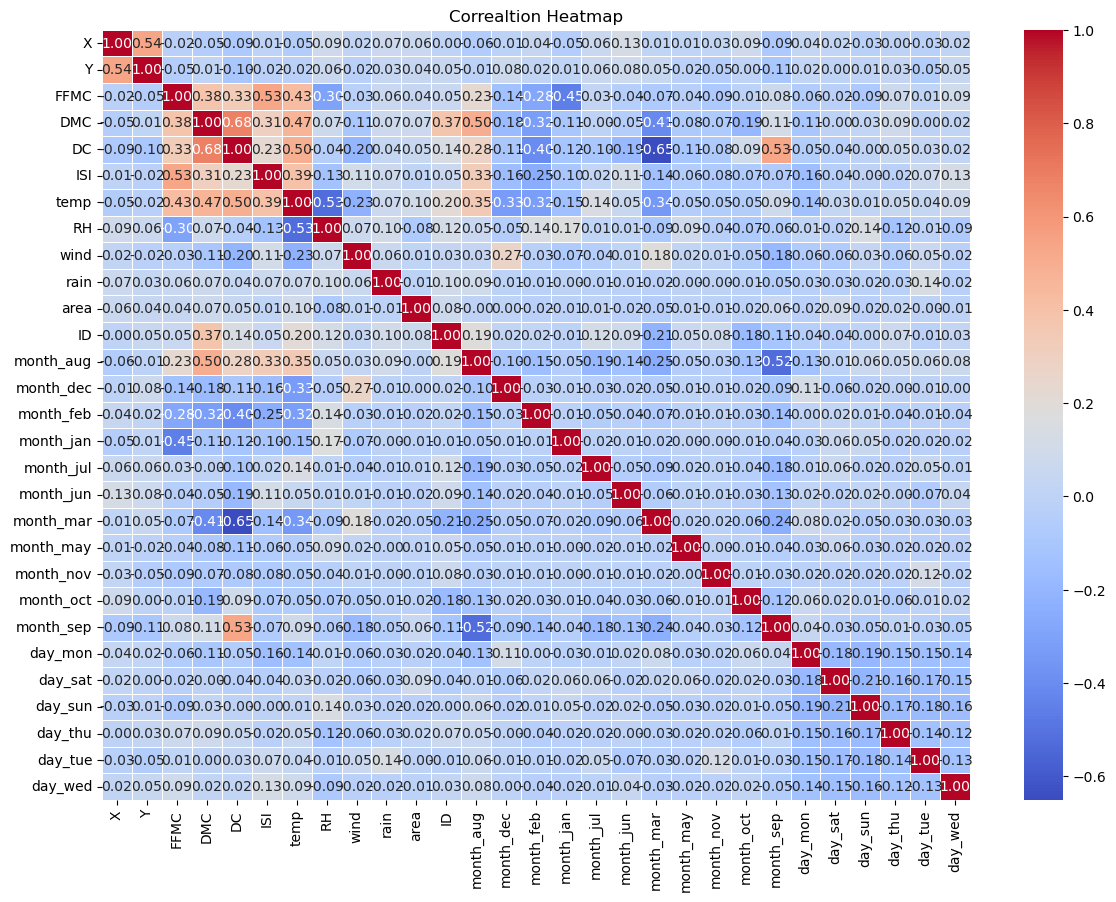

In [152]:
plt.figure(figsize=(14,10))

corr_matrix = forestfire2.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correaltion Heatmap")
plt.show()